In [1]:
#Steps Done:
#1. Data Collection
#2. Data Review
#3. Data Preprocessing & Cleaning
#4. Feature Engineering
#5. Basic EDA

In [2]:
# Importing Library & DataSet

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Library for Loading and Data manipulation
import pandas as pd

#Library for Numerical calculations
import numpy as np

# Library for Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WIA1007_Group_Assignment/laptopData.csv')

**Data View**

In [6]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df.shape

(1303, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [9]:
# Check for Duplicates, Missing Values & Errors
df.duplicated().sum()

29

In [10]:
# Check for Duplicates, Missing Values & Errors
df.isnull().sum()

,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30


In [11]:
# Check for both duplicates and null values
duplicates = df.duplicated()
null_values = df.isnull()

# Display rows with duplicates and null values
duplicates_and_nulls = df[duplicates | null_values.any(axis=1)]
print(duplicates_and_nulls)


      Unnamed: 0 Company TypeName Inches ScreenResolution  Cpu  Ram Memory  \
20           NaN     NaN      NaN    NaN              NaN  NaN  NaN    NaN   
46           NaN     NaN      NaN    NaN              NaN  NaN  NaN    NaN   
50           NaN     NaN      NaN    NaN              NaN  NaN  NaN    NaN   
115          NaN     NaN      NaN    NaN              NaN  NaN  NaN    NaN   
125          NaN     NaN      NaN    NaN              NaN  NaN  NaN    NaN   
148          NaN     NaN      NaN    NaN              NaN  NaN  NaN    NaN   
190          NaN     NaN      NaN    NaN              NaN  NaN  NaN    NaN   
209          NaN     NaN      NaN    NaN              NaN  NaN  NaN    NaN   
267          NaN     NaN      NaN    NaN              NaN  NaN  NaN    NaN   
336          NaN     NaN      NaN    NaN              NaN  NaN  NaN    NaN   
350          NaN     NaN      NaN    NaN              NaN  NaN  NaN    NaN   
478          NaN     NaN      NaN    NaN              NaN  NaN  

In [12]:
#Removing Null Values
df.dropna(axis=0,inplace=True)

In [13]:
df.head(30)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8.0,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9.0,Acer,Ultrabook,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [14]:
#Recheck Data Errors
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [16]:
# Check for Data Consistency & Entry-Releated Errors
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [17]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [18]:
df['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [19]:
# Check for Data Consistency. Found this "?" in Inches Column.

In [20]:
# Check how many rows have '?' in the 'Inches' column
rows_with_question_mark = df[df['Inches'] == '?'].shape[0]

# Print the result
print(f"Number of rows with '?' in 'Inches' column: {rows_with_question_mark}")

Number of rows with '?' in 'Inches' column: 1


In [21]:
# As the number of rows affected is 1 with this error, deleted the row, because it's not imputable.

In [22]:
# Delete rows where 'Inches' column contains '?'
df = df[df['Inches'] != '?']
df = df.reset_index(drop=True)

In [23]:
# Check how many rows have '?' in the 'Inches' column
rows_with_question_mark = df[df['Inches'] == '?'].shape[0]

# Print the result
print(f"Number of rows with '?' in 'Inches' column: {rows_with_question_mark}")

Number of rows with '?' in 'Inches' column: 0


In [24]:
df['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '31.6', '17', '15', '14.1', '11.3', '10.1'], dtype=object)

In [25]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', '

In [26]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [27]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [28]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [29]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [30]:
df['Price'].unique()

array([ 71378.6832,  47895.5232,  30636.    , 135195.336 ,  96095.808 ,
        21312.    , 114017.6016,  61735.536 ,  79653.6   ,  41025.6   ,
        20986.992 ,  18381.0672, 130001.6016,  26581.392 ,  67260.672 ,
        80908.344 ,  39693.6   , 152274.24  ,  26586.72  ,  52161.12  ,
        53226.72  ,  13746.24  ,  43636.32  ,  35111.52  ,  22305.1392,
        58554.72  ,  42624.    ,  69157.44  ,  47738.88  ,  13053.0672,
        10602.72  ,  23389.92  ,  99580.32  ,  53173.44  ,  13266.72  ,
        19553.76  ,  26037.4032,  46833.12  ,  20725.92  ,  79866.72  ,
        27864.9072,  36336.96  ,  75604.32  ,  69210.72  ,  34045.92  ,
        24828.48  ,  44808.48  ,  21231.5472,  58767.84  ,  20459.52  ,
        40908.384 ,  31232.2032, 130482.72  ,  22111.2   ,  31914.72  ,
        50136.48  ,  36763.2   , 105654.24  ,  23373.4032,  12201.12  ,
        29250.72  ,  50562.72  ,  58021.92  ,  50882.4   ,  46353.6   ,
        58341.6   ,  27652.32  ,  45554.4   ,  28238.4   ,  5205

In [31]:
# End of Data Consistency Check & Errors

In [32]:
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [33]:
# Droppign Unnecessary Unnamed: 0 Column
df.drop(columns=['Unnamed: 0'],inplace = True)

In [34]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

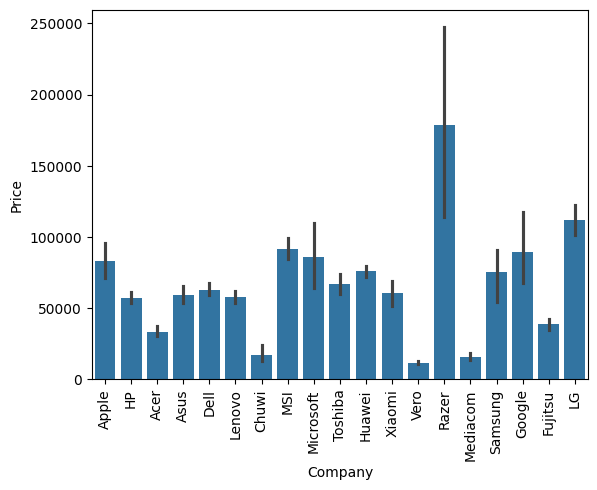

In [35]:
sns.barplot(x='Company',y='Price',data=df)
plt.xticks(rotation='vertical')

In [36]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [37]:
# df = df.join(pd.get_dummies(df['Company'],dtype=int))
# df = df.drop("Company",axis=1)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Gaming'),
  Text(3, 0, '2 in 1 Convertible'),
  Text(4, 0, 'Workstation'),
  Text(5, 0, 'Netbook')])

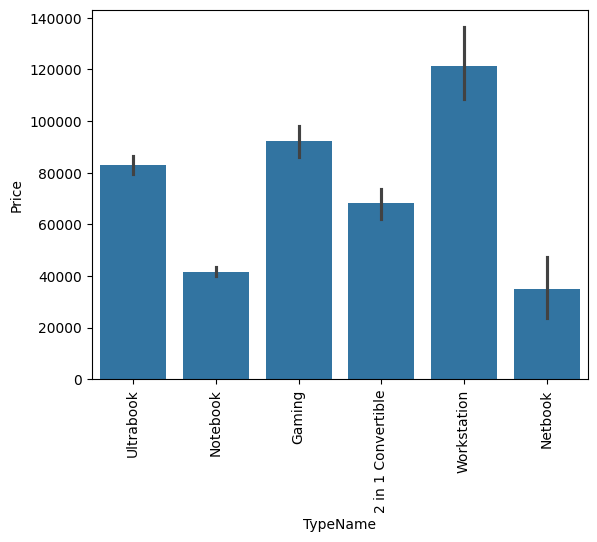

In [38]:
sns.barplot(x='TypeName',y='Price',data=df)
plt.xticks(rotation='vertical')

In [39]:
# df = df.join(pd.get_dummies(df['TypeName'],dtype=int))
# df = df.drop("TypeName",axis=1)

In [40]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [41]:
df['Ram']=df['Ram'].astype(int)

In [42]:
# Check how many rows have '?' in the 'Inches' column
rows_with_question_mark = df[df['Weight'] == '?'].shape[0]

# Print the result
print(f"Number of rows with '?' in 'Weight' column: {rows_with_question_mark}")

Number of rows with '?' in 'Weight' column: 1


In [43]:
df['Weight'].replace('?', pd.NA, inplace=True)

<ipython-input-43-e4ee8fe62971>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].replace('?', pd.NA, inplace=True)


In [44]:
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
mean_weight = df['Weight'].mean()
df['Weight'].fillna(mean_weight, inplace=True)
df['Weight'] = df['Weight'].astype(float)

<ipython-input-44-2b4507b71846>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].fillna(mean_weight, inplace=True)


<ipython-input-45-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

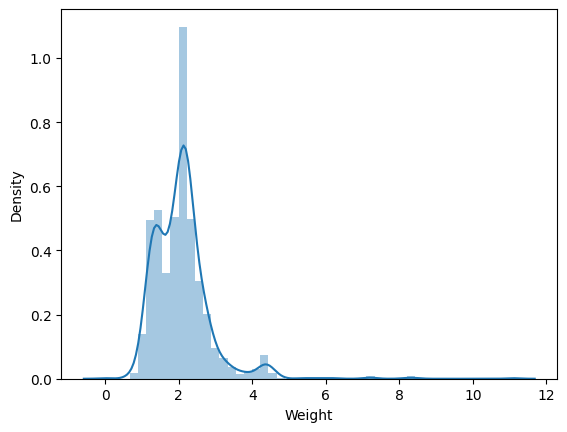

In [45]:
sns.distplot(df['Weight'])

In [46]:
df['Weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1272 entries, 0 to 1271
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
1272 non-null   float64
dtypes: float64(1)
memory usage: 10.1 KB


In [47]:
#df['Weight'] = df['Weight'].astype(float)

In [48]:
#Rechecking if there is any ? mark input presence in the data.
rows_with_question_mark = df[df['Weight'] == '?'].shape[0]
print(f"Number of rows with '?' in 'Weight' column: {rows_with_question_mark}")

Number of rows with '?' in 'Weight' column: 0


<ipython-input-49-d06f8f3fa03e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

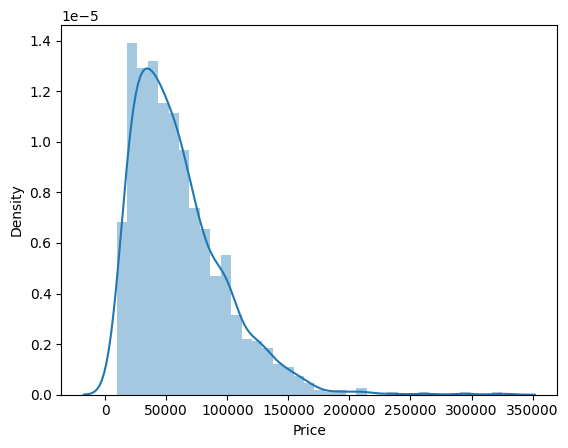

In [49]:
#For Price Column
sns.distplot(df['Price'])

<ipython-input-50-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

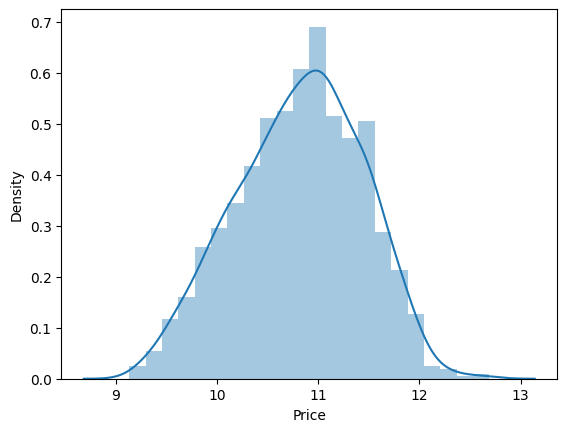

In [50]:
sns.distplot(np.log(df['Price']))

In [51]:
# df['Price_log'] = np.log(df['Price'])

In [52]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '13.3'),
  Text(1, 0, '15.6'),
  Text(2, 0, '15.4'),
  Text(3, 0, '14'),
  Text(4, 0, '12'),
  Text(5, 0, '17.3'),
  Text(6, 0, '13.5'),
  Text(7, 0, '12.5'),
  Text(8, 0, '13'),
  Text(9, 0, '18.4'),
  Text(10, 0, '13.9'),
  Text(11, 0, '11.6'),
  Text(12, 0, '25.6'),
  Text(13, 0, '35.6'),
  Text(14, 0, '12.3'),
  Text(15, 0, '27.3'),
  Text(16, 0, '24'),
  Text(17, 0, '33.5'),
  Text(18, 0, '31.6'),
  Text(19, 0, '17'),
  Text(20, 0, '15'),
  Text(21, 0, '14.1'),
  Text(22, 0, '11.3'),
  Text(23, 0, '10.1')])

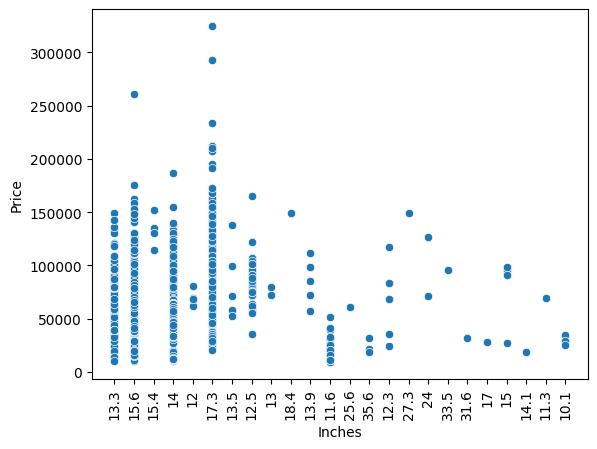

In [53]:
# For Inches Column, Let's see the Scatterplot
sns.scatterplot(x='Inches',y='Price',data=df)
plt.xticks(rotation='vertical')

In [54]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,494
1366x768,274
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,52
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [55]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='Touchscreen', ylabel='Price'>

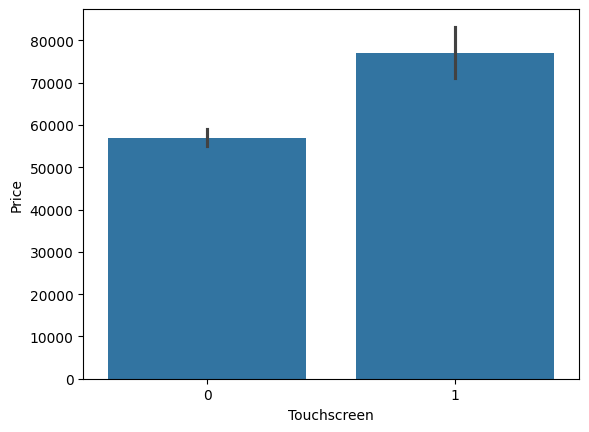

In [56]:
sns.barplot(x='Touchscreen',y='Price',data=df)

<Axes: xlabel='Ips', ylabel='Price'>

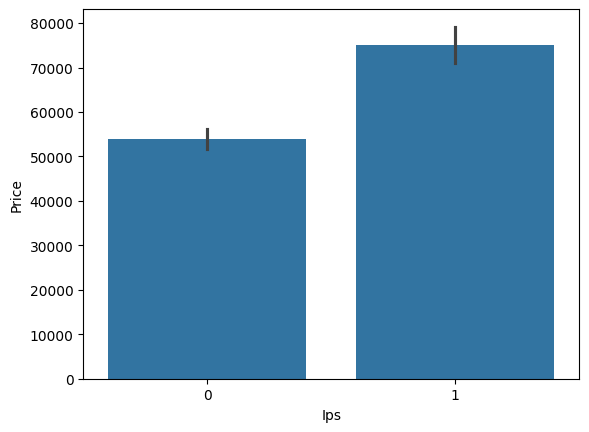

In [57]:
sns.barplot(x='Ips',y='Price',data=df)

In [58]:
df['temp_screenres'] = df.ScreenResolution.str.split(" ").apply(lambda x:x[-1])
df['Screen_Width'] = df.temp_screenres.str.split("x").apply(lambda x:x[0])
df['Screen_Height'] = df.temp_screenres.str.split("x").apply(lambda x:x[1])
df.drop(columns=['temp_screenres'],inplace=True)

In [59]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Screen_Width,Screen_Height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [60]:
df['Screen_Width'] = df['Screen_Width'].astype(int)
df['Screen_Height'] = df['Screen_Height'].astype(int)

In [61]:
subset_df = df[['Price', 'Inches', 'Screen_Width', 'Screen_Height']]
correlation_matrix = subset_df.corr()
print(correlation_matrix)

                  Price    Inches  Screen_Width  Screen_Height
Price          1.000000  0.044681      0.558218       0.554753
Inches         0.044681  1.000000     -0.052356      -0.063981
Screen_Width   0.558218 -0.052356      1.000000       0.994149
Screen_Height  0.554753 -0.063981      0.994149       1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1272 non-null   object 
 1   TypeName          1272 non-null   object 
 2   Inches            1272 non-null   object 
 3   ScreenResolution  1272 non-null   object 
 4   Cpu               1272 non-null   object 
 5   Ram               1272 non-null   int64  
 6   Memory            1272 non-null   object 
 7   Gpu               1272 non-null   object 
 8   OpSys             1272 non-null   object 
 9   Weight            1272 non-null   float64
 10  Price             1272 non-null   float64
 11  Touchscreen       1272 non-null   int64  
 12  Ips               1272 non-null   int64  
 13  Screen_Width      1272 non-null   int64  
 14  Screen_Height     1272 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 149.2+ KB


In [63]:
df['Inches']=df['Inches'].astype(float)

In [64]:
df['ppi']=(((df['Screen_Width']**2)+(df['Screen_Height']**2))**0.5/df['Inches']).astype('float')

In [65]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Screen_Width,Screen_Height,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940


In [66]:
#This Section is For CPU Only

#1. CPU Name
#2. Generation
#3. Clock Speed

In [67]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,141
Intel Core i7 7500U 2.7GHz,128
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
...,...
AMD A9-Series 9420 2.9GHz,1
Intel Core i7 2.2GHz,1
AMD A6-Series 7310 2GHz,1


In [68]:
df['Processor_Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [69]:
def fetch_processor (text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
      return 'AMD Processor'

In [70]:
df['Processor'] = df['Processor_Name'].apply(fetch_processor)
df = df.drop('Processor_Name', axis=1)

In [71]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Screen_Width,Screen_Height,ppi,Processor
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5


In [72]:
df["CPU_Speed"] = df.Cpu.str.split(" ").apply(lambda x:x[-1])
df["CPU_Speed"] = df["CPU_Speed"].str[:-3]

In [73]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Screen_Width,Screen_Height,ppi,Processor,CPU_Speed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,3.1


<Axes: xlabel='Processor'>

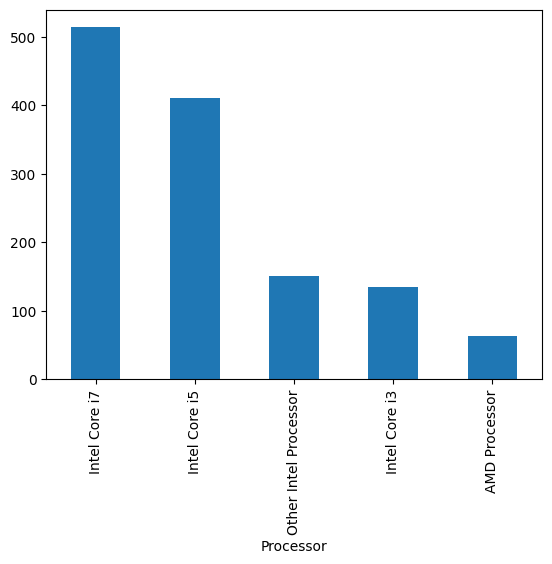

In [74]:
df['Processor'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

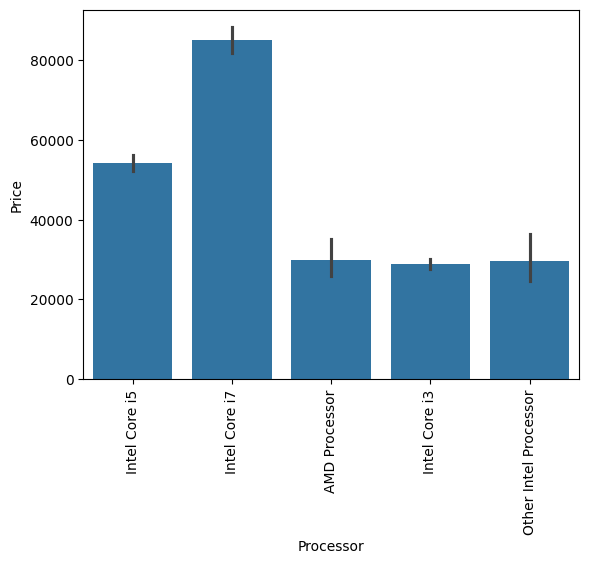

In [75]:
sns.barplot(x='Processor',y='Price',data=df)
plt.xticks(rotation='vertical')

In [76]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,400
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [77]:
#This Section is for Memory

In [78]:
rows_with_question_mark = df[df['Memory'] == '?'].shape[0]
print(f"Number of rows with '?' in 'Memory' column: {rows_with_question_mark}")

Number of rows with '?' in 'Memory' column: 1


In [79]:
df = df[df['Memory'] != '?']
df = df.reset_index(drop=True)

In [80]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,400
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [81]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Screen_Width,Screen_Height,ppi,Processor,CPU_Speed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,1.8


In [82]:
#df["Memory_Size_Old"] = df.Memory.str.split(" ").apply(lambda x:x[0])
#df["Memory_Type"] = df.Memory.str.split(" ").apply(lambda x:x[-1])

In [83]:
#def turn_memory_into_GB (value):
#  value = str(value)
#  if "TB" in value:
#    value = value.replace("TB","")
#    return int((float(value)*1024))
#  elif "GB" in value:
#      value = value.replace("GB","")
#      return int(value)
#  else:
#        return int(value)

In [84]:
#df["Memory_Size_New"] = df["Memory_Size"].apply(turn_memory_into_GB)

In [85]:
#df['Memory_Size_New'].value_counts()

In [86]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,400
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [87]:
df_memory = pd.DataFrame(df, columns=["Memory"])

In [88]:
import re

In [89]:
# Function to extract storage sizes for SSD, HDD, Flash, and Hybrid
def extract_storage_sizes(Memory):
    # Default values for SSD, HDD, Flash, and Hybrid (all 0 initially)
    ssd_size = 0
    hdd_size = 0
    flash_size = 0
    hybrid_size = 0

    # Regular expression to match the sizes and types
    ssd_match = re.search(r"(\d+)(GB|TB|MB|KB)\s*SSD", Memory)
    hdd_match = re.search(r"(\d+)(GB|TB|MB|KB)\s*HDD", Memory)
    flash_match = re.search(r"(\d+)(GB|TB|MB|KB)\s*Flash", Memory)
    hybrid_match = re.search(r"(\d+)(GB|TB|MB|KB)\s*Hybrid", Memory)

    # If SSD is mentioned, capture its size
    if ssd_match:
        size, unit = ssd_match.groups()
        size = int(size)
        if unit == "TB":
            size *= 1024  # Convert TB to GB
        ssd_size = size

    # If HDD is mentioned, capture its size
    if hdd_match:
        size, unit = hdd_match.groups()
        size = int(size)
        if unit == "TB":
            size *= 1024  # Convert TB to GB
        hdd_size = size

    # If Flash is mentioned, capture its size
    if flash_match:
        size, unit = flash_match.groups()
        size = int(size)
        if unit == "TB":
            size *= 1024  # Convert TB to GB
        flash_size = size

    # If Hybrid is mentioned, capture its size
    if hybrid_match:
        size, unit = hybrid_match.groups()
        size = int(size)
        if unit == "TB":
            size *= 1024  # Convert TB to GB
        hybrid_size = size

    return pd.Series([ssd_size, hdd_size, flash_size, hybrid_size])

# Apply the extraction function and create the new columns: SSD, HDD, Flash, Hybrid
df_memory[['SSD', 'HDD', 'Flash', 'Hybrid']] = df_memory['Memory'].apply(extract_storage_sizes)

In [90]:
df_memory.head(5)

,Memory,SSD,HDD,Flash,Hybrid
0,128GB SSD,128,0,0,0
1,128GB Flash Storage,0,0,128,0
2,256GB SSD,256,0,0,0
3,512GB SSD,512,0,0,0
4,256GB SSD,256,0,0,0


In [91]:
df_memory.drop('Memory', axis=1, inplace=True)

In [92]:
df_memory

,SSD,HDD,Flash,Hybrid
0,128,0,0,0
1,0,0,128,0
2,256,0,0,0
3,512,0,0,0
4,256,0,0,0
...,...,...,...,...
1266,128,0,0,0
1267,512,0,0,0
1268,0,0,64,0
1269,0,1024,0,0


In [93]:
aligned_indices = df.index.equals(df_memory.index)
print(aligned_indices)

True


In [94]:
df[['SSD', 'HDD', 'Flash', 'Hybrid']] = df_memory[['SSD', 'HDD', 'Flash', 'Hybrid']]

# Now, drop df_memory
del df_memory  # This will delete the df_memory dataframe

In [95]:
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Ips,Screen_Width,Screen_Height,ppi,Processor,CPU_Speed,SSD,HDD,Flash,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,1,2560,1600,226.983005,Intel Core i5,2.3,128,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,1440,900,127.677940,Intel Core i5,1.8,0,0,128,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,0,1920,1080,141.211998,Intel Core i5,2.5,256,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,1,2880,1800,220.534624,Intel Core i7,2.7,512,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,1,2560,1600,226.983005,Intel Core i5,3.1,256,0,0,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,...,0,1366,768,100.454670,AMD Processor,3,0,500,0,0
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,...,1,2880,1800,220.534624,Intel Core i7,2.2,0,0,256,0
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,1440,900,127.677940,Intel Core i5,1.8,0,0,256,0
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,...,0,1920,1080,157.350512,Intel Core i7,1.8,512,0,0,0
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,...,1,1920,1080,157.350512,Intel Core i5,1.6,256,0,0,0


In [96]:
# This section is for GPU

In [97]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,271
Intel HD Graphics 520,181
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [98]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [99]:
df['Gpu_Brand'].value_counts()

,count
Gpu_Brand,
Intel,703
Nvidia,392
AMD,175
ARM,1


([0, 1, 2, 3],
 [Text(0, 0, 'Intel'),
  Text(1, 0, 'AMD'),
  Text(2, 0, 'Nvidia'),
  Text(3, 0, 'ARM')])

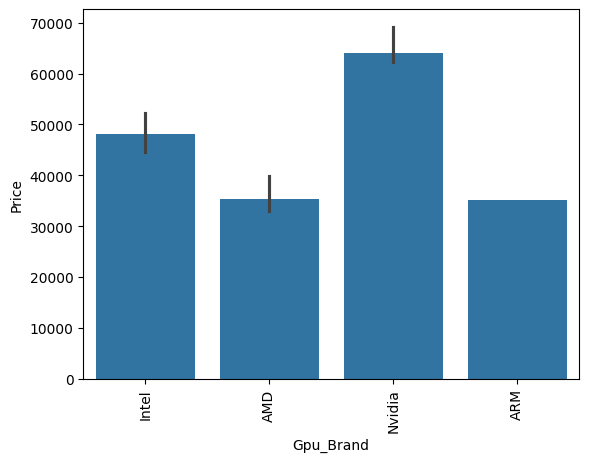

In [100]:
sns.barplot(x=df['Gpu_Brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')

In [101]:
# This Section is for Operating System

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Windows 10 S'),
  Text(6, 0, 'Chrome OS'),
  Text(7, 0, 'Windows 7'),
  Text(8, 0, 'Android')])

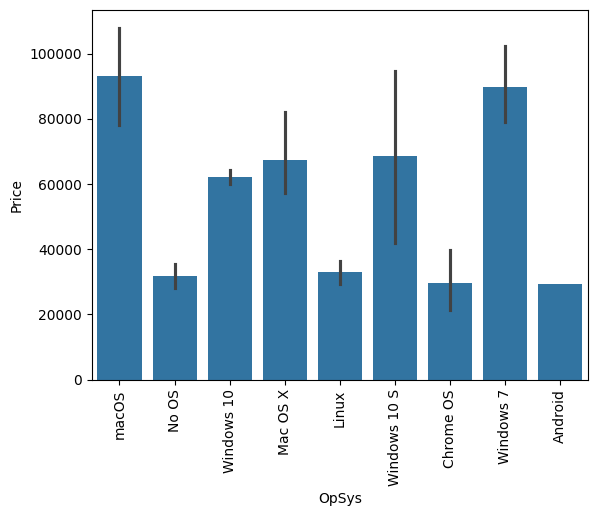

In [102]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')

In [103]:
def os_fetch (inp):
  if inp == 'macOS' or inp == 'Mac OS X':
    return 'Mac'
  elif inp == 'Windows 10' or inp == 'Windows 10 S' or inp == 'Windows 7':
    return 'Windows'
  else:
    return 'Other OS/No OS/Linux'


In [104]:
df['OS'] = df['OpSys'].apply(os_fetch)

In [105]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Screen_Height,ppi,Processor,CPU_Speed,SSD,HDD,Flash,Hybrid,Gpu_Brand,OS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,1600,226.983005,Intel Core i5,2.3,128,0,0,0,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,900,127.677940,Intel Core i5,1.8,0,0,128,0,Intel,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1080,141.211998,Intel Core i5,2.5,256,0,0,0,Intel,Other OS/No OS/Linux
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,1800,220.534624,Intel Core i7,2.7,512,0,0,0,AMD,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,1600,226.983005,Intel Core i5,3.1,256,0,0,0,Intel,Mac


In [106]:
df.drop('ScreenResolution',axis=1,inplace=True)

In [107]:
df.drop('Cpu',axis=1,inplace=True)

In [108]:
df.drop('Gpu',axis=1,inplace=True)

In [109]:
df.drop('Memory',axis=1,inplace=True)

In [110]:
df.head(2)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Ips,Screen_Width,Screen_Height,ppi,Processor,CPU_Speed,SSD,HDD,Flash,Hybrid,Gpu_Brand,OS
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,2.3,128,0,0,0,Intel,Mac
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,1.8,0,0,128,0,Intel,Mac


In [111]:
# df = df.join(pd.get_dummies(df['Gpu_Brand'],dtype=int))

In [112]:
df.head(2)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Ips,Screen_Width,Screen_Height,ppi,Processor,CPU_Speed,SSD,HDD,Flash,Hybrid,Gpu_Brand,OS
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,2.3,128,0,0,0,Intel,Mac
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,1.8,0,0,128,0,Intel,Mac


In [113]:
# df = df.join(pd.get_dummies(df['OS'],dtype=int))

In [114]:
# Format ppi to two decimal places
df['ppi'] = df['ppi'].round(2)

# Change price from rupees to USD and format the price column to two decimal places
df['Price'] = (df['Price'] * 0.01176).round(2)

# Check if there is any row with Weight equal to 0.0002
if (df['Weight'] == 0.0002).any():
    # Get the index of the row
    weight_row_index = df[df['Weight'] == 0.0002].index[0]

    # Drop the row at the found index
    df = df.drop(index=weight_row_index)

In [115]:
df.head(2)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Ips,Screen_Width,Screen_Height,ppi,Processor,CPU_Speed,SSD,HDD,Flash,Hybrid,Gpu_Brand,OS
0,Apple,Ultrabook,13.3,8,macOS,1.37,839.41,0,1,2560,1600,226.98,Intel Core i5,2.3,128,0,0,0,Intel,Mac
1,Apple,Ultrabook,13.3,8,macOS,1.34,563.25,0,0,1440,900,127.68,Intel Core i5,1.8,0,0,128,0,Intel,Mac


In [116]:
new_file_path = '/content/drive/MyDrive/Colab Notebooks/WIA1007_Group_Assignment/laptopData_table_cleaned.csv'  # Replace with desired path and filename

df.to_csv(new_file_path, index=False)  # Save the DataFrame to a CSV file